In [21]:
# Here we will use a dataset including measurements and weight of fish to see how accurately we 
# can predict the species of that fish.

# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
fish = pd.read_csv("C:\\Users\\user\\Desktop\\Data\\Fish.csv")
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [22]:
# Length1 is the vertical length, Length2 the diagonal length and Length3 the cross length. We'll edit
# the column titles to reflect this
fish.rename(columns={"Length1":"Vertical length","Length2": "Diagonal length","Length3":"Cross length"}, inplace=True)
fish.head()

,Species,Weight,Vertical length,Diagonal length,Cross length,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [23]:
# Let's inspect the dataset to see whether we have any null values
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Species          159 non-null    object 
 1   Weight           159 non-null    float64
 2   Vertical length  159 non-null    float64
 3   Diagonal length  159 non-null    float64
 4   Cross length     159 non-null    float64
 5   Height           159 non-null    float64
 6   Width            159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


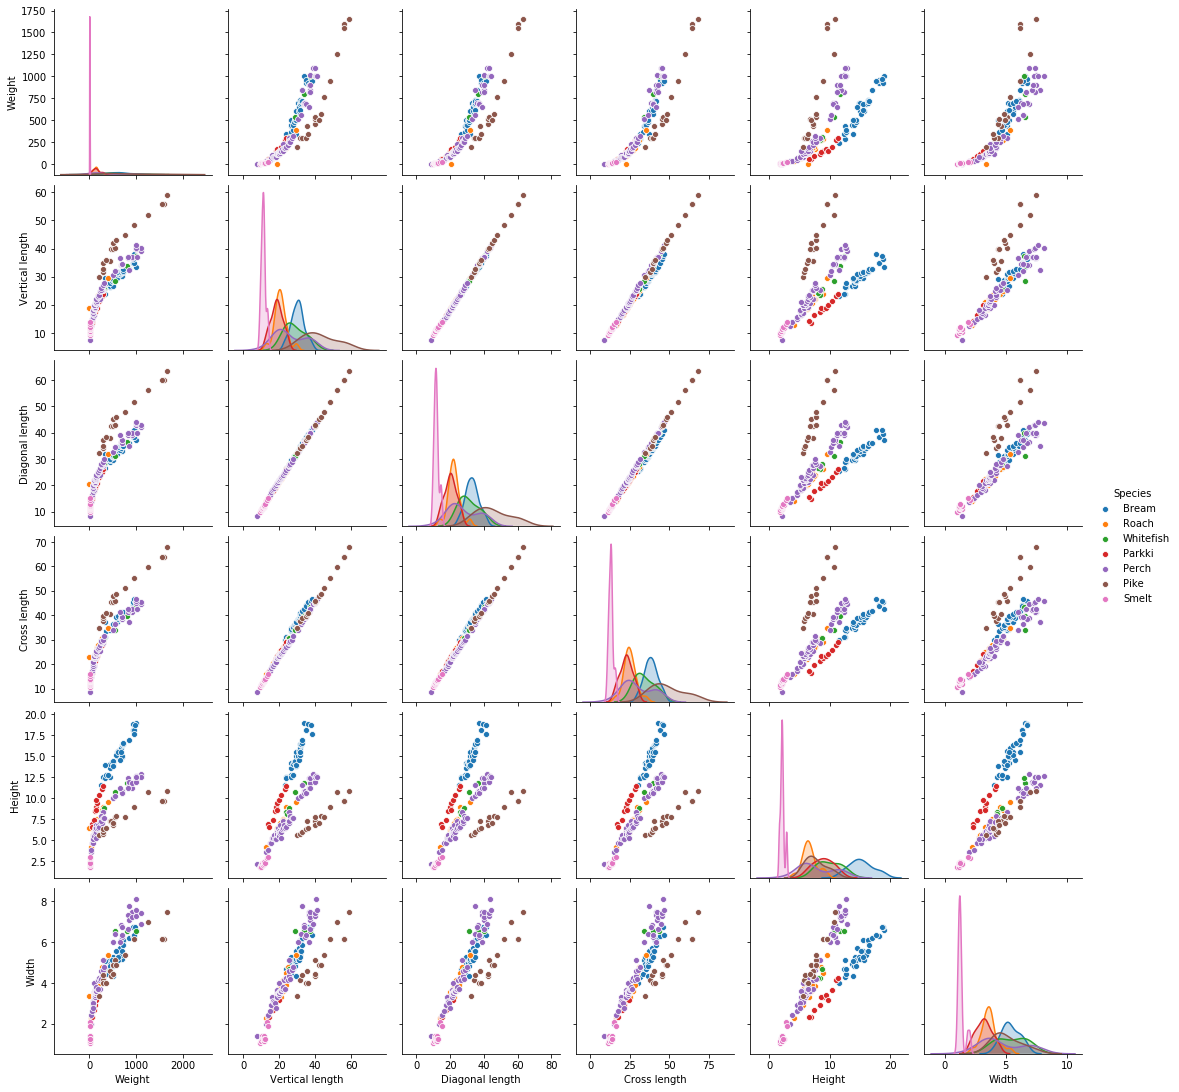

In [24]:
# No null values, so we don't need to impute anything
# Let's visualise our features
sns.pairplot(fish, hue="Species", kind="scatter")
plt.show()

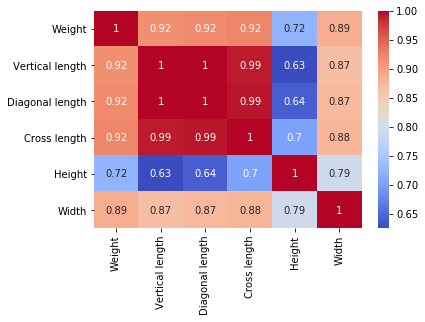

In [25]:
sns.heatmap(fish.corr(), cmap="coolwarm", annot=True)
plt.show()

In [26]:
# What we see here is extremely close correlation (as you might expect) between measurements such as
# cross length, vertical length and dioagonal length. Let's remove two of them and just have one 
# value for length
fish.drop(["Vertical length", "Cross length"], axis=1, inplace=True)
fish.rename(columns={"Diagonal length": "Length"}, inplace=True)
fish.head()

,Species,Weight,Length,Height,Width
0,Bream,242.0,25.4,11.5200,4.0200
1,Bream,290.0,26.3,12.4800,4.3056
2,Bream,340.0,26.5,12.3778,4.6961
3,Bream,363.0,29.0,12.7300,4.4555
4,Bream,430.0,29.0,12.4440,5.1340


In [31]:
# Now we have more sensible "Length, Height and Width" features. 

# We'll first try logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
features = ["Weight", "Length", "Height", "Width"]
x = fish[features]
y = fish["Species"]
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=1)
model = LogisticRegression(multi_class="multinomial")
model.fit(x_train, y_train)
predictions = model.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy: ", accuracy)



Accuracy:  0.71875


C:\Users\user\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
# So, we get 72% accuracy using logistic regression. How about if we try a decision tree classifier:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.75


In [41]:
# This is a marginally better result, with 75% accuracy. For our third model, we'll try K-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)
neigh.fit(x_train, y_train)
predictions = neigh.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy: ", accuracy)
print(predictions)

Accuracy:  0.59375
['Bream' 'Perch' 'Bream' 'Perch' 'Perch' 'Bream' 'Roach' 'Bream' 'Smelt'
 'Roach' 'Perch' 'Roach' 'Smelt' 'Perch' 'Perch' 'Perch' 'Roach' 'Bream'
 'Pike' 'Perch' 'Smelt' 'Smelt' 'Roach' 'Bream' 'Perch' 'Bream' 'Bream'
 'Smelt' 'Perch' 'Roach' 'Bream' 'Perch']


In [43]:
# K-nearest neightbours is actually the worst of our models.

# If we go back to our pairplot, where we visualised all of our features, we can see there are some 
# features where the distinction between species is clearer. This might hold the key to getting better
# results from our models. These are height and diagonal length - let's see if we can use them to
# better predict our species, using the best model we have so far, DecisionTreeClassifier
features = ["Height", "Length"]
x = fish[features]
x_train, x_test, y_train, y_test =  train_test_split(x, y, test_size=0.2, random_state=1)
clf2 = DecisionTreeClassifier()
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)
accuracy = accuracy_score(predictions, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.8125


In [44]:
# This increases our model accuracy, despite using fewer features.

# A separate question is how well we can predict the weight of a fish using its volumetric measurements,
# and to what extent do our predictions improve if we know the species? This is a classic linear
# regression question
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
features = ["Length", "Height", "Width"]
x = fish[features]
y = fish["Weight"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr = LinearRegression()
lr.fit(x_train, y_train)
predictions = lr.predict(x_test)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)


RMSE:  134.27136451763997


count     159.000000
mean      398.326415
std       357.978317
min         0.000000
25%       120.000000
50%       273.000000
75%       650.000000
max      1650.000000
Name: Weight, dtype: float64


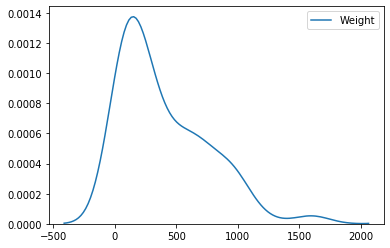

In [47]:
# How does an error of 134 compare with the disribution of the values for weight? Let's have a look:
print(fish["Weight"].describe())
sns.kdeplot(fish["Weight"])
plt.show()

In [48]:
# Given that the standard deviation is 357, an error of 134 is not too bad. We also have quite a range
# of values

# Now we can see if our model improves if we include the species of the fish. We'll need to use dummies
# in order to utilise the species column
species_dummies = pd.get_dummies(fish["Species"])
print(species_dummies.head())

   Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
0      1       0      0     0      0      0          0
1      1       0      0     0      0      0          0
2      1       0      0     0      0      0          0
3      1       0      0     0      0      0          0
4      1       0      0     0      0      0          0


In [49]:
fish.drop(["Species"], axis=1, inplace=True)
fish = pd.concat([fish, species_dummies], axis=1)
fish.head()

,Weight,Length,Height,Width,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,242.0,25.4,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,26.3,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,26.5,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,29.0,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,29.0,12.4440,5.1340,1,0,0,0,0,0,0


In [53]:
# We now have our dummies and can create the linear regression model
features = ["Length","Height","Width", "Bream","Parkki","Perch","Pike","Roach","Smelt","Whitefish"]
x = fish[features]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
lr2 = LinearRegression()
lr2.fit(x_train, y_train)
predictions2 = lr2.predict(x_test)
mse2 = mean_squared_error(predictions2, y_test)
rmse2 = np.sqrt(mse2)
print("RMSE: ", rmse2)

RMSE:  111.68217658377021


In [ ]:
# Here we see an improvement, which suggests that there are differences in the physiologies of different
# species that contributes to a change in weight